In [1]:
#.libPaths("/home/kostyadovnar/CVUT/BI-PRS/packages")
.libPaths("/home/senyaaa/BI-PRS/packages")
#.libPaths("")

library(Sleuth2)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(olsrr)
options(width=160, repr.plot.width=12, repr.plot.height=8) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




In [2]:
surname <- "downar"
L <- nchar(surname)
K <- 9
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 2


## Základní statistická šetření

Stahneme potřebný dataset. 

In [3]:
data("ex0327", package = "Sleuth2")

data <- ex0327
data

,Country,Life,Income,Type
,<chr>,<dbl>,<dbl>,<fct>
1,Australia,71.0,3426,Industrialized
2,Austria,70.4,3350,Industrialized
3,Belgium,70.6,3346,Industrialized
4,Canada,72.0,4751,Industrialized
5,Denmark,73.3,5029,Industrialized
6,Finland,69.8,3312,Industrialized
7,France,72.3,3403,Industrialized
8,West_Germany,70.3,5040,Industrialized
9,Ireland,70.7,2009,Industrialized


### Stručný popis datasetu

Datový soubor představuje sadu dat obsahující informace o různých zemích, jejichž průměrné délce života, HDP na osobu a kategorii rozvoje. V datovém souboru jsou zastoupeny 29 zemí, včetně průmyslově rozvinutých zemí a zemí, které jsou vývozci ropy. Každý řádek odpovídá jedné zemi a sloupce obsahují informace o jejich charakteristikách. Datový soubor také obsahuje chybějící hodnotu pro délku života v Jihoafrické republice.

Význam jednotlivých atributů:
* **Country**: vektor znaků označující zemi
* **Life**: průměrná délka života (roky)
* **Income**: příjmy v roce 1974 (americké dolary)
* **Type**: proměnná typového faktoru s úrovněmi "Industrialized " a"Petroleum"

Vzhledem k tomu, že Jihoafrická republika nemá hodnotu příjmu, naplníme ji průměrnou hodnotou příjmů zemí stejného typu.

In [4]:
# Vybereme země se stejným typem jako Jižní Afrika
same_type_countries <- subset(data, Type == "Industrialized" & !is.na(Income))

# Vypočteme průměrnou hodnotu příjmu pro tyto země
mean_income <- mean(same_type_countries$Income, na.rm = TRUE)

# Nahradíme chybějící hodnotu pro příjem v Jižní Africe průměrem
data[16, "Income"] <- mean_income
data$Income <- round(data$Income)
data

,Country,Life,Income,Type
,<chr>,<dbl>,<dbl>,<fct>
1,Australia,71.0,3426,Industrialized
2,Austria,70.4,3350,Industrialized
3,Belgium,70.6,3346,Industrialized
4,Canada,72.0,4751,Industrialized
5,Denmark,73.3,5029,Industrialized
6,Finland,69.8,3312,Industrialized
7,France,72.3,3403,Industrialized
8,West_Germany,70.3,5040,Industrialized
9,Ireland,70.7,2009,Industrialized


### Základní statistiky

In [5]:
# Oddělení dat pro každý typ země
industrialized_countries <- subset(data, Type == "Industrialized")
petroleum_countries <- subset(data, Type == "Petroleum")

# Základní statistiky pro průmyslově rozvinuté země - Life
mean_industrialized_life <- mean(industrialized_countries$Life, na.rm = TRUE)
median_industrialized_life <- median(industrialized_countries$Life, na.rm = TRUE)
sd_industrialized_life <- sd(industrialized_countries$Life, na.rm = TRUE)
min_industrialized_life <- min(industrialized_countries$Life, na.rm = TRUE)
max_industrialized_life <- max(industrialized_countries$Life, na.rm = TRUE)
count_industrialized_life <- length(industrialized_countries$Life)

# Základní statistiky pro země závislé na ropě - Life
mean_petroleum_life <- mean(petroleum_countries$Life, na.rm = TRUE)
median_petroleum_life <- median(petroleum_countries$Life, na.rm = TRUE)
sd_petroleum_life <- sd(petroleum_countries$Life, na.rm = TRUE)
min_petroleum_life <- min(petroleum_countries$Life, na.rm = TRUE)
max_petroleum_life <- max(petroleum_countries$Life, na.rm = TRUE)
count_petroleum_life <- length(petroleum_countries$Life)

# Základní statistiky pro průmyslově rozvinuté země - Income
mean_industrialized_income <- mean(industrialized_countries$Income, na.rm = TRUE)
median_industrialized_income <- median(industrialized_countries$Income, na.rm = TRUE)
sd_industrialized_income <- sd(industrialized_countries$Income, na.rm = TRUE)
min_industrialized_income <- min(industrialized_countries$Income, na.rm = TRUE)
max_industrialized_income <- max(industrialized_countries$Income, na.rm = TRUE)
count_industrialized_income <- length(industrialized_countries$Income)

# Základní statistiky pro země závislé na ropě - Income
mean_petroleum_income <- mean(petroleum_countries$Income, na.rm = TRUE)
median_petroleum_income <- median(petroleum_countries$Income, na.rm = TRUE)
sd_petroleum_income <- sd(petroleum_countries$Income, na.rm = TRUE)
min_petroleum_income <- min(petroleum_countries$Income, na.rm = TRUE)
max_petroleum_income <- max(petroleum_countries$Income, na.rm = TRUE)
count_petroleum_income <- length(petroleum_countries$Income)

# Vytvoření tabulky pro základní statistiky
basic_stats <- data.frame(
  Statistic = c("Mean", "Median", "Standard deviation", "Minimum", "Maximum", "Observations"),
  Life_Industr = c(mean_industrialized_life, median_industrialized_life, sd_industrialized_life, min_industrialized_life, max_industrialized_life, count_industrialized_life),
  Life_Petrol = c(mean_petroleum_life, median_petroleum_life, sd_petroleum_life, min_petroleum_life, max_petroleum_life, count_petroleum_life),
  Income_Industr = c(mean_industrialized_income, median_industrialized_income, sd_industrialized_income, min_industrialized_income, max_industrialized_income, count_industrialized_income),
  Income_Petrol = c(mean_petroleum_income, median_petroleum_income, sd_petroleum_income, min_petroleum_income, max_petroleum_income, count_petroleum_income)  
)

# Okrouhlení číselných sloupců na 2 desetinná místa
basic_stats <- basic_stats %>%
  mutate_if(is.numeric, ~round(., digits = 2))

# Výpis tabulky
print(basic_stats)

           Statistic Life_Industr Life_Petrol Income_Industr Income_Petrol
1               Mean        71.47       49.98        3617.10        966.67
2             Median        71.20       50.70        3414.50        560.00
3 Standard deviation         1.77        8.05        1188.48        924.64
4            Minimum        68.10       36.90         956.00        110.00
5            Maximum        74.70       66.40        5596.00       3010.00
6       Observations        20.00        9.00          20.00          9.00


* Průměr (Mean):
    * Průměrná délka života v průmyslově rozvinutých zemích je vyšší než v zemích závislých na ropě. Tento rozdíl může být způsoben lepšími sociálními a zdravotními podmínkami, které existují v průmyslově rozvinutých zemích a umožňují obyvatelům žít déle.
    * Průměrný příjem na obyvatele v průmyslově rozvinutých zemích je výrazně vyšší než v zemích závislých na ropě. To může být důsledek vyšší úrovně ekonomického rozvoje, většího zaměstnaností a vyšší produktivity práce v průmyslově rozvinutých zemích.


* Medián (Median):
    * Medián délky života a příjmu na obyvatele poskytuje informace o střední hodnotě v datasetu, které nejsou ovlivněny extrémními hodnotami. Různé hodnoty mediánu v průmyslově rozvinutých zemích a zemích závislých na ropě mohou být důsledkem rozdílů v distribuci dat a míře koncentrace hodnot kolem střední hodnoty.


* Standardní odchylka (Standard deviation):
    * Vyšší standardní odchylka délky života ve zemích závislých na ropě naznačuje větší variabilitu v tomto ukazateli mezi těmito zeměmi. To může být způsobeno různými socioekonomickými faktory, jako jsou dostupnost zdravotní péče, životní podmínky a infrastruktura.
    * Standardní odchylka příjmu na obyvatele je vyšší průmyslově rozvinutých zemích, což může být důsledkem rozdílů v ekonomickém rozvoji, příjmové nerovnosti a diverzifikace ekonomiky.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


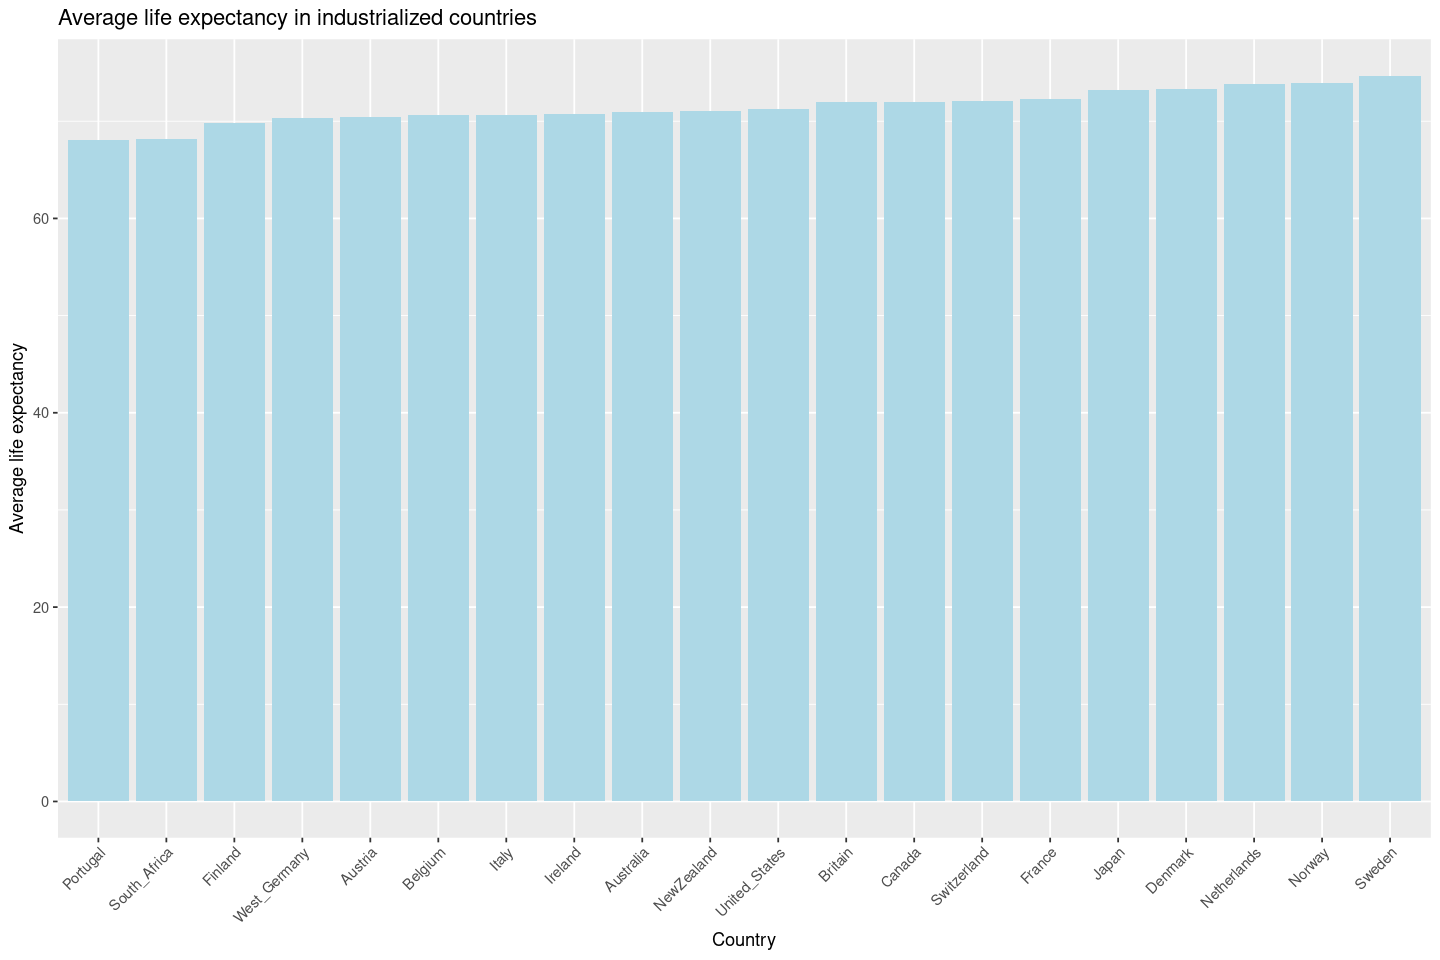

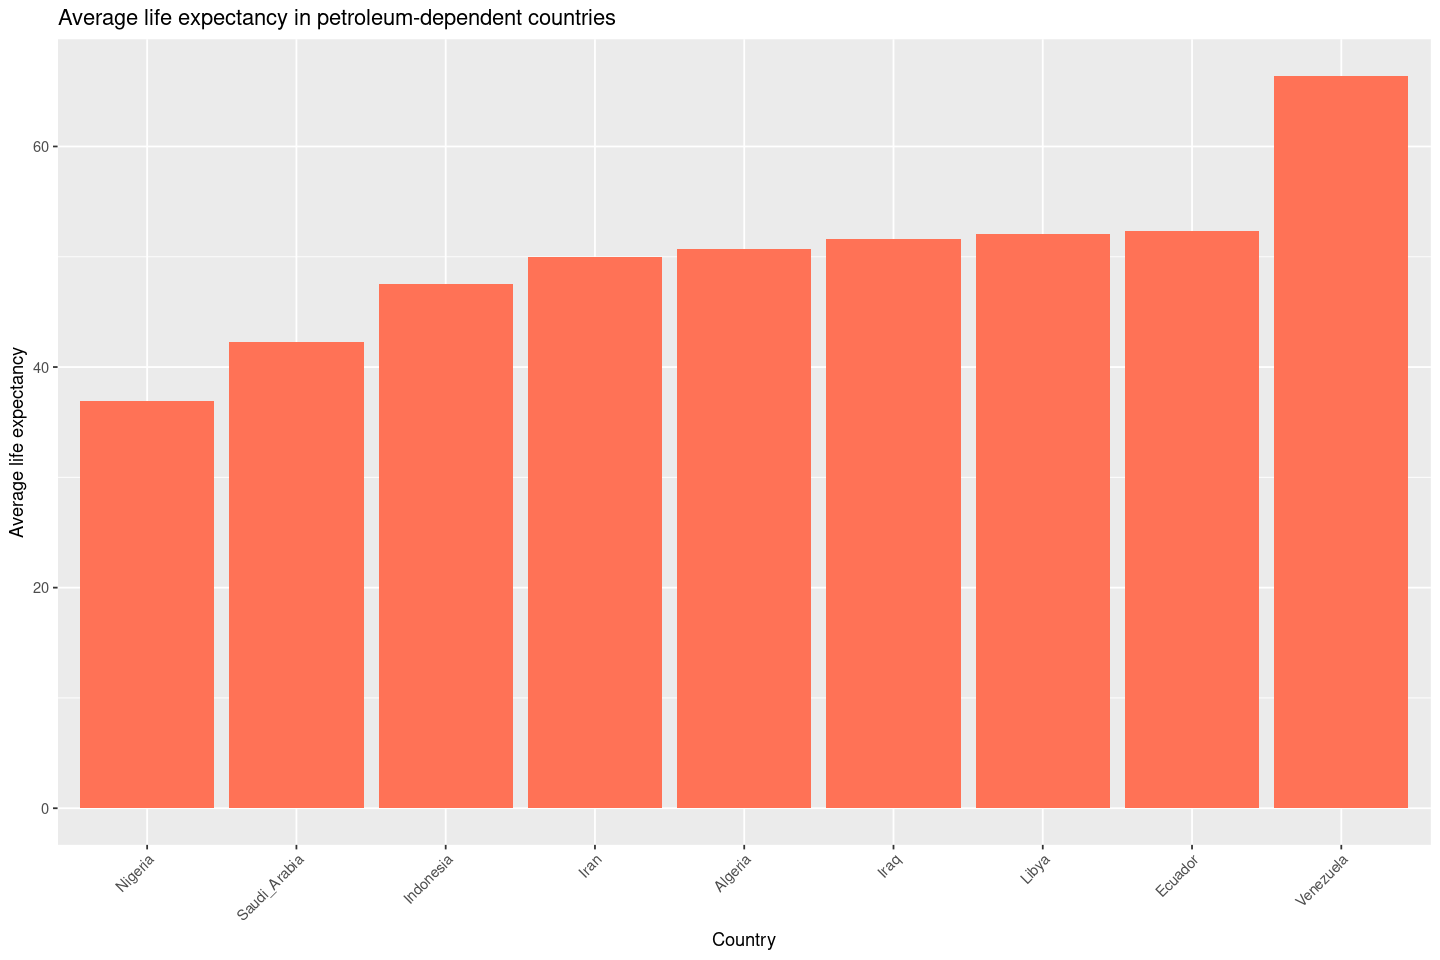

In [6]:
# Průměrná délka života v průmyslově rozvinutých zemích
ggplot(industrialized_countries, aes(x = reorder(Country, Life), y = Life, fill = "lightblue")) +
  geom_bar(stat = "identity") +
  labs(title = "Average life expectancy in industrialized countries", x = "Country", y = "Average life expectancy") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = "lightblue") +
  guides(fill = FALSE)

# Průměrná délka života ve zemích závislých na ropě
ggplot(petroleum_countries, aes(x = reorder(Country, Life), y = Life, fill = "lightgreen")) +
  geom_bar(stat = "identity") +
  labs(title = "Average life expectancy in petroleum-dependent countries", x = "Country", y = "Average life expectancy") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = "coral1") +
  guides(fill = FALSE)

* Můžeme si všimnout zajímavé skutečnosti: nejvyšší průměrná délka života mezi zeměmi typu **Petroleum** je pod nejhorším ukazatelem mezi zeměmi typu **Industrialized**.

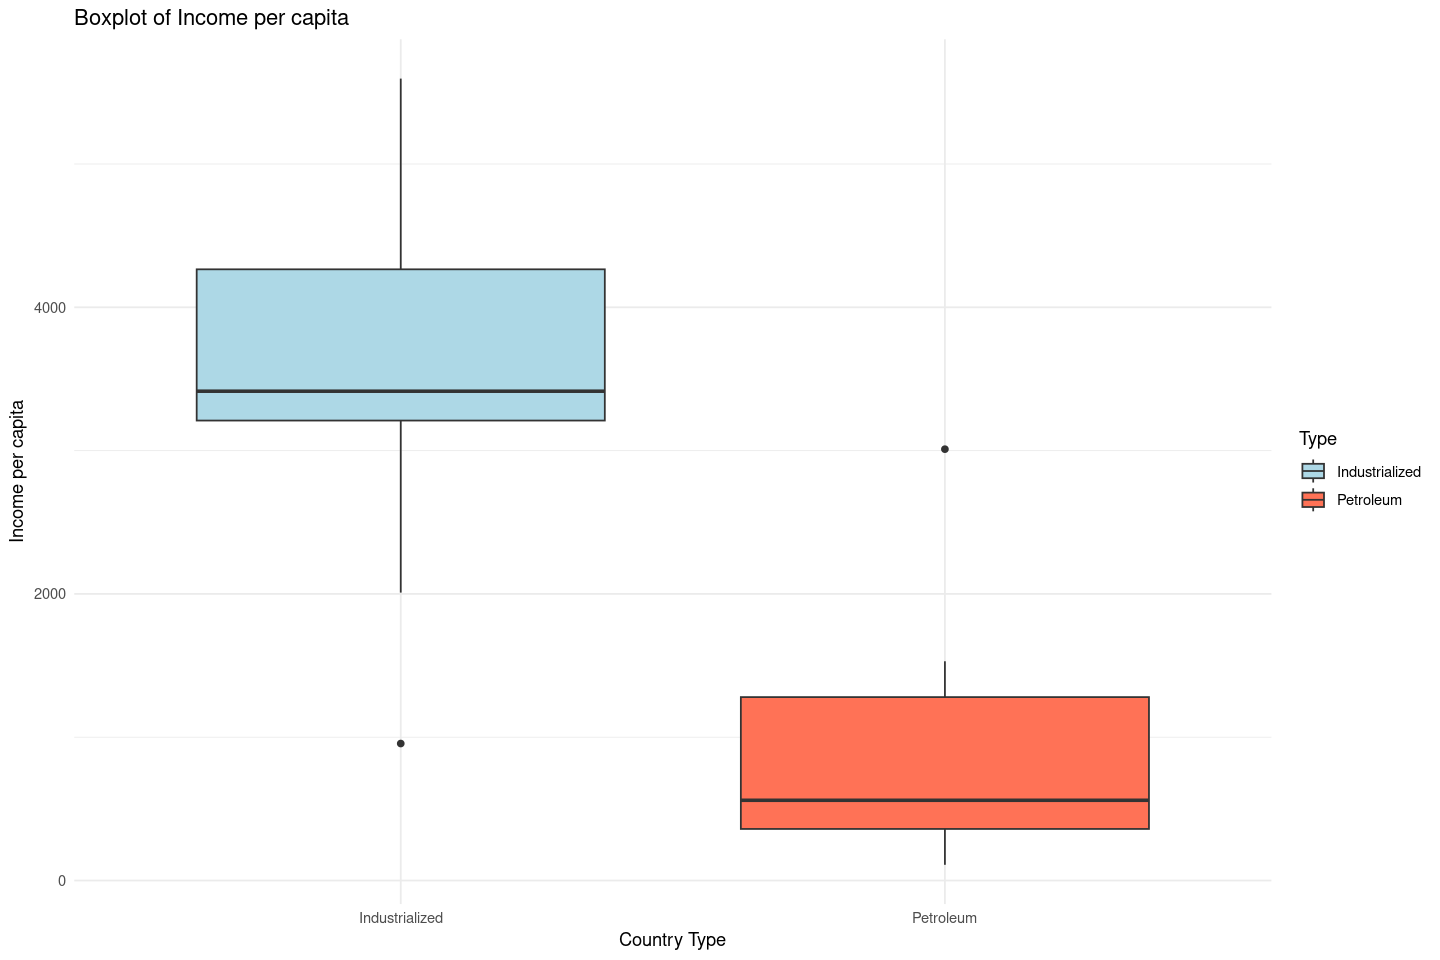

In [7]:
# Boxplot příjmů na obyvatele
ggplot(data, aes(x = Type, y = Income, fill = Type)) +
  geom_boxplot() +
  labs(title = "Boxplot of Income per capita",
       x = "Country Type",
       y = "Income per capita") +
  scale_fill_manual(values = c("lightblue", "coral1"), 
                    breaks = c("Industrialized", "Petroleum"), 
                    labels = c("Industrialized", "Petroleum")) + 
  theme_minimal()

Tento graf opět ukazuje, jak silná je propast mezi průmyslově vyspělými zeměmi a zeměmi závislými na ropě.

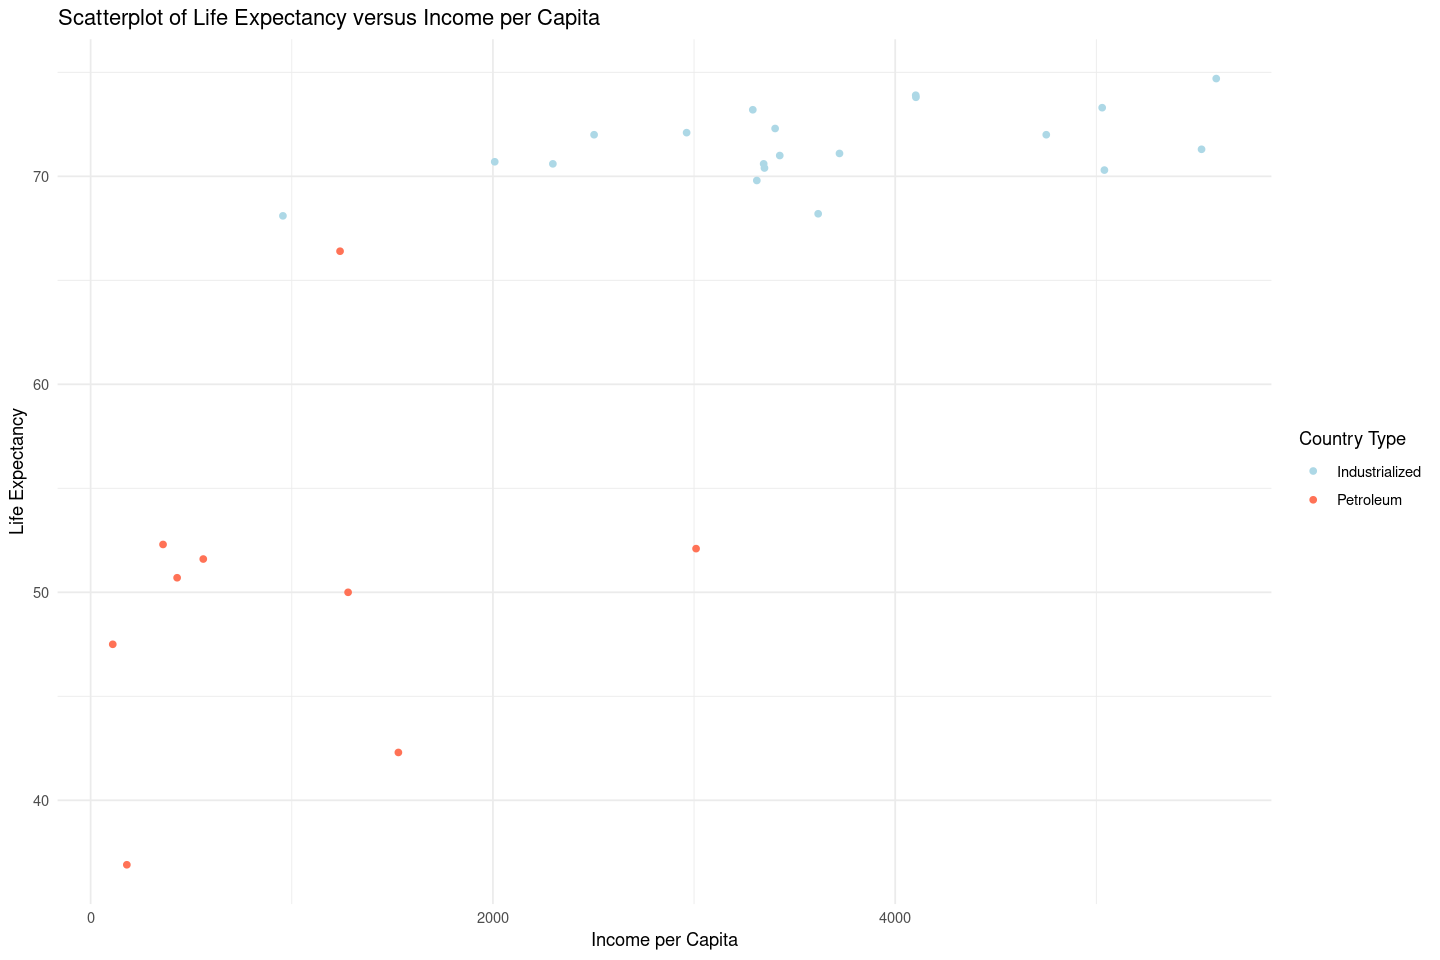

In [8]:
# Scatterplot délky života versus příjmu na obyvatele
ggplot(data, aes(x = Income, y = Life, color = Type)) +
  geom_point() +
  labs(title = "Scatterplot of Life Expectancy versus Income per Capita",
       x = "Income per Capita",
       y = "Life Expectancy",
       color = "Country Type") +
  scale_color_manual(values = c("Industrialized" = "lightblue", "Petroleum" = "coral1")) +
  theme_minimal()

Tento graf označuje závislost, která bude hlavním tématem v příštím úkolu.

## Zkoumání numerického regresoru

Vzhledem k tomu, že průměrný příjem je jediným numerickým atributem v našem datasetu, nemáme jinou možnost než si jej vybrat.

Z předchozího grafu je patrné, že hodnota průměrné délky života roste s rostoucím průměrným příjmem, což je vcelku logické.

* Nyní pokusíme rovnou vložit regresní polynom do dat na obrázku.
* Zkusíme více různých variant modelu.

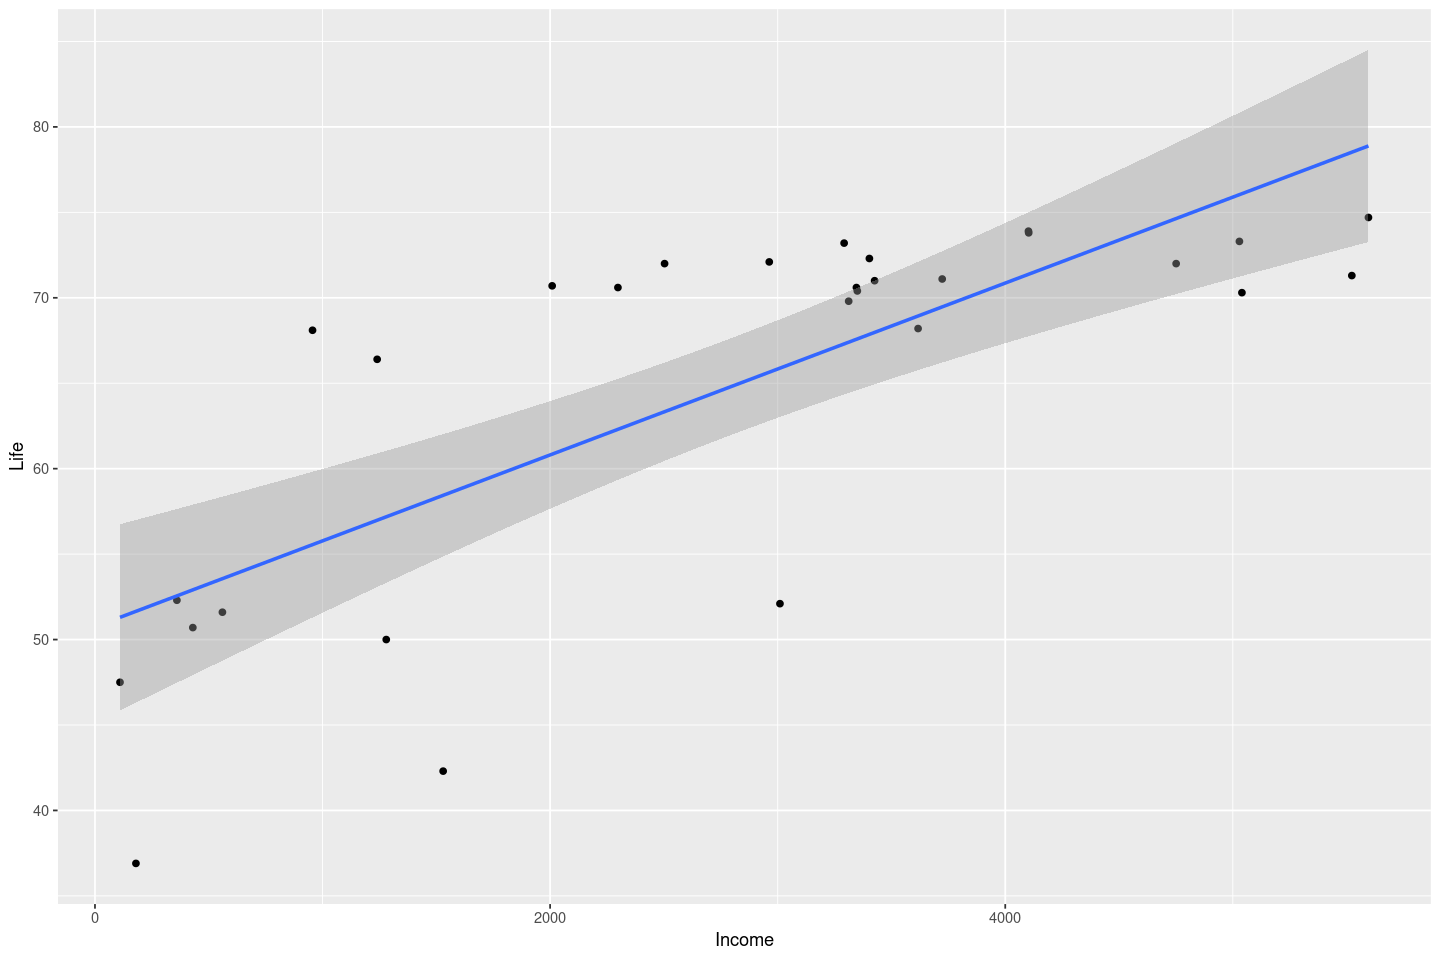

In [9]:
# Life = Intercept + Income
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x)

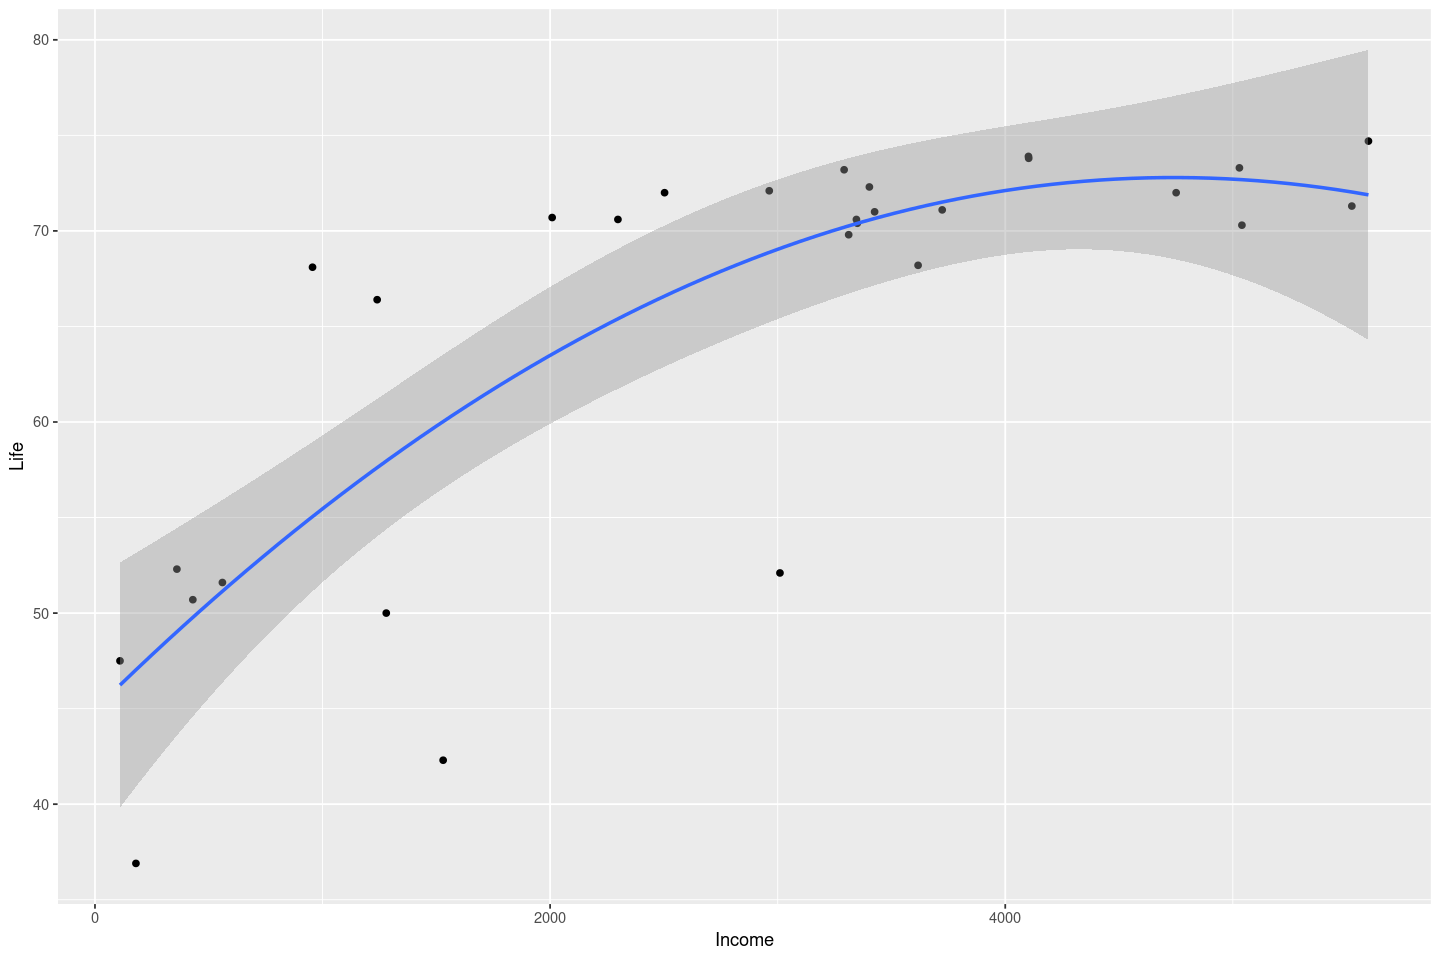

In [10]:
# Life = Intercept + Income + Income^2
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x + I(x^2))

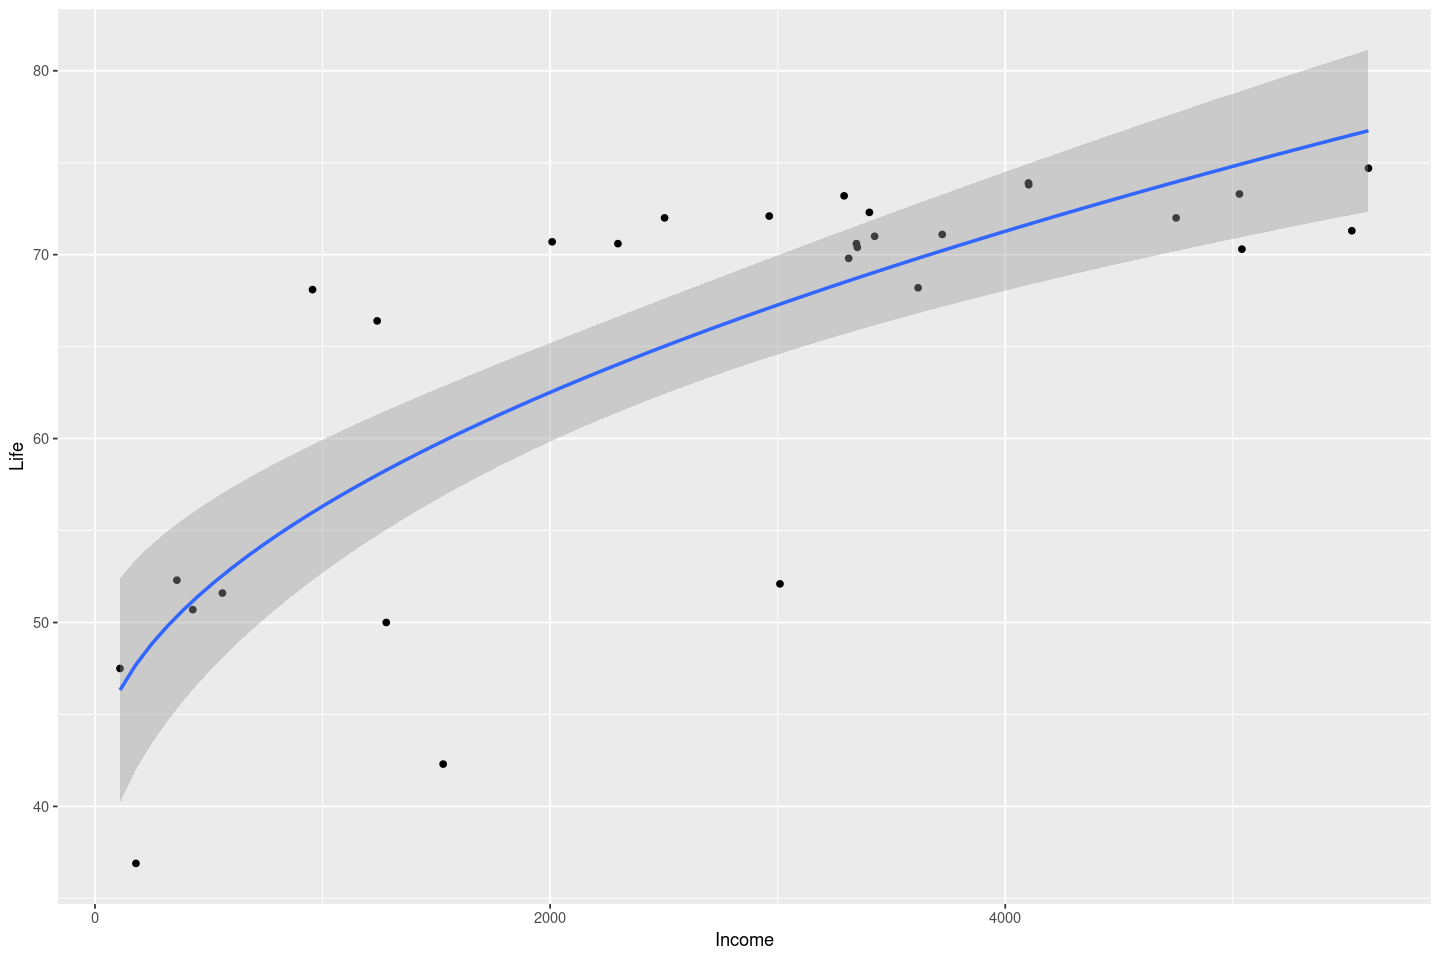

In [11]:
# Life = Intercept + sqrt(Income)
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~sqrt(x))

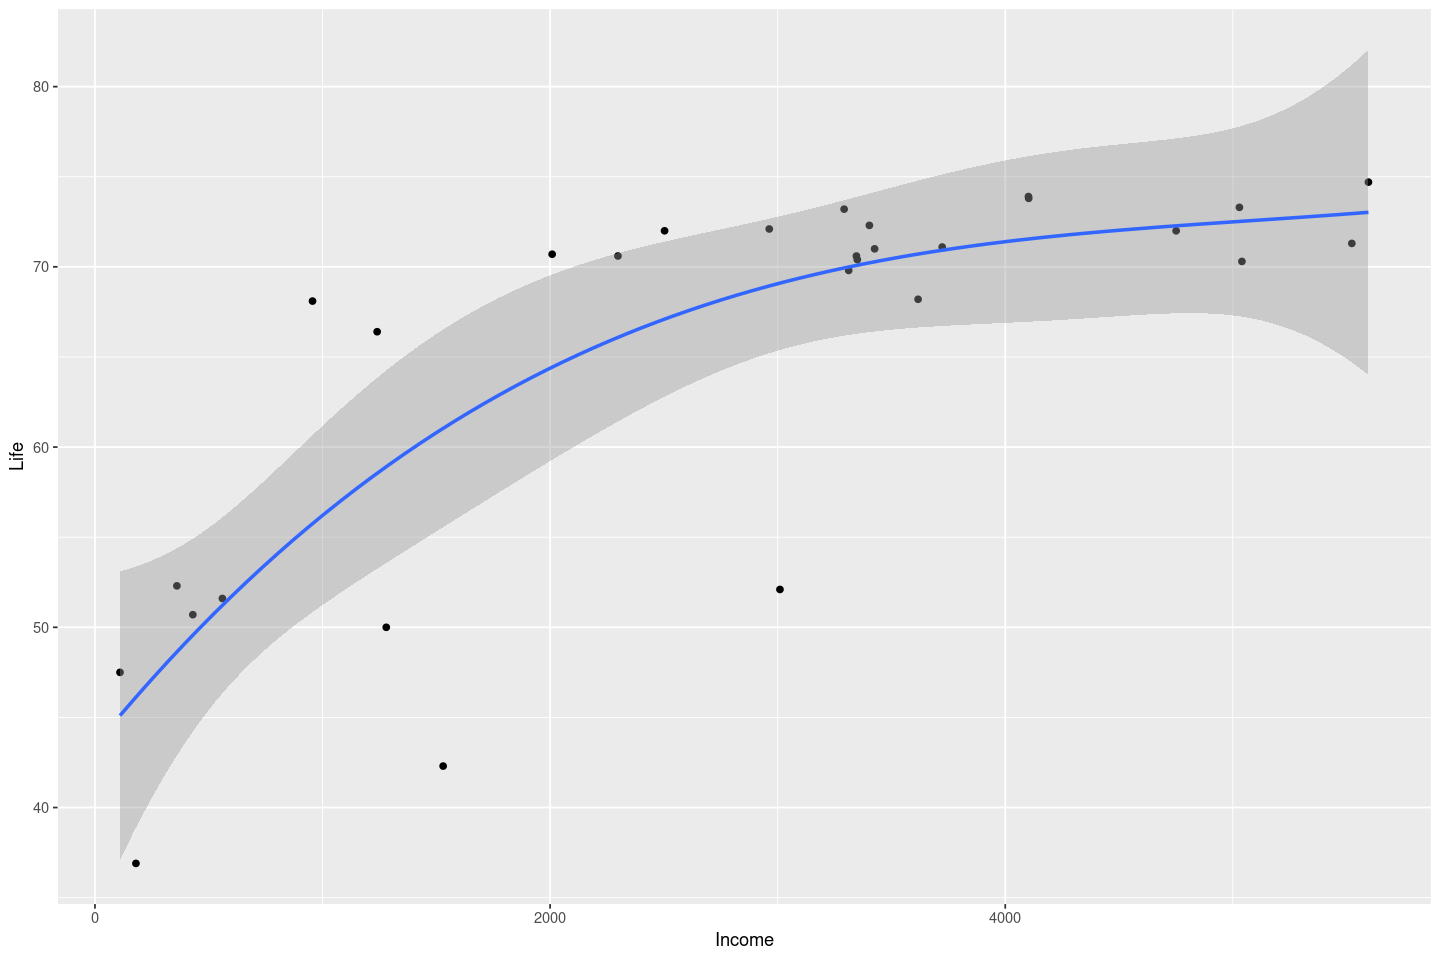

In [12]:
# Life = Intercept + Income + Income^2 + Income^3
ggplot(data, aes(x=Income, y=Life)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x + I(x^2) + I(x^3))

* Poslední možnost vypadá lépe než všechny ostatní, protože poměrně přirozeně naznačuje závislost mezi průměrným příjmem a průměrnou délkou života.
* Poukazuje na to, jak s rostoucím průměrným příjmem roste průměrná délka života.
* Na základě těchto pozorování lze usoudit, že graf prokazuje pozitivní vztah mezi příjmem a délkou života.
* Jak ukazuje graf, s rostoucím příjmem se průměrná délka života zvyšuje. Tento trend je očekávaný, protože vyšší příjem obvykle umožňuje lidem život v lepších podmínkách, což vede k delšímu životu.
* Přímka však neroste příliš rychle, což zas odpovídá realitě (lidé bohužel nebo naštěstí nežijí 150 let).

Nyní můžeme nafitovat model (odhadnout parametry) a připravit predikce, abychom v budoucnu vykreslili predikční interval modelu.

In [13]:
fit <- lm(Life ~ Income + I(Income^2) + I(Income^3), data=data)
tmp <- predict(fit, interval="prediction")
predict <- cbind(data, tmp)
predict$Type = NULL
predict

Warning message in predict.lm(fit, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


,Country,Life,Income,fit,lwr,upr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,71.0,3426,70.28096,55.62989,84.93204
2,Austria,70.4,3350,70.09151,55.45792,84.72509
3,Belgium,70.6,3346,70.08123,55.44846,84.71400
4,Canada,72.0,4751,72.27512,57.33378,87.21646
5,Denmark,73.3,5029,72.51945,57.44016,87.59875
6,Finland,69.8,3312,69.99256,55.36628,84.61884
7,France,72.3,3403,70.22479,55.57939,84.87020
8,West_Germany,70.3,5040,72.52884,57.43910,87.61858
9,Ireland,70.7,2009,64.43315,49.39432,79.47197


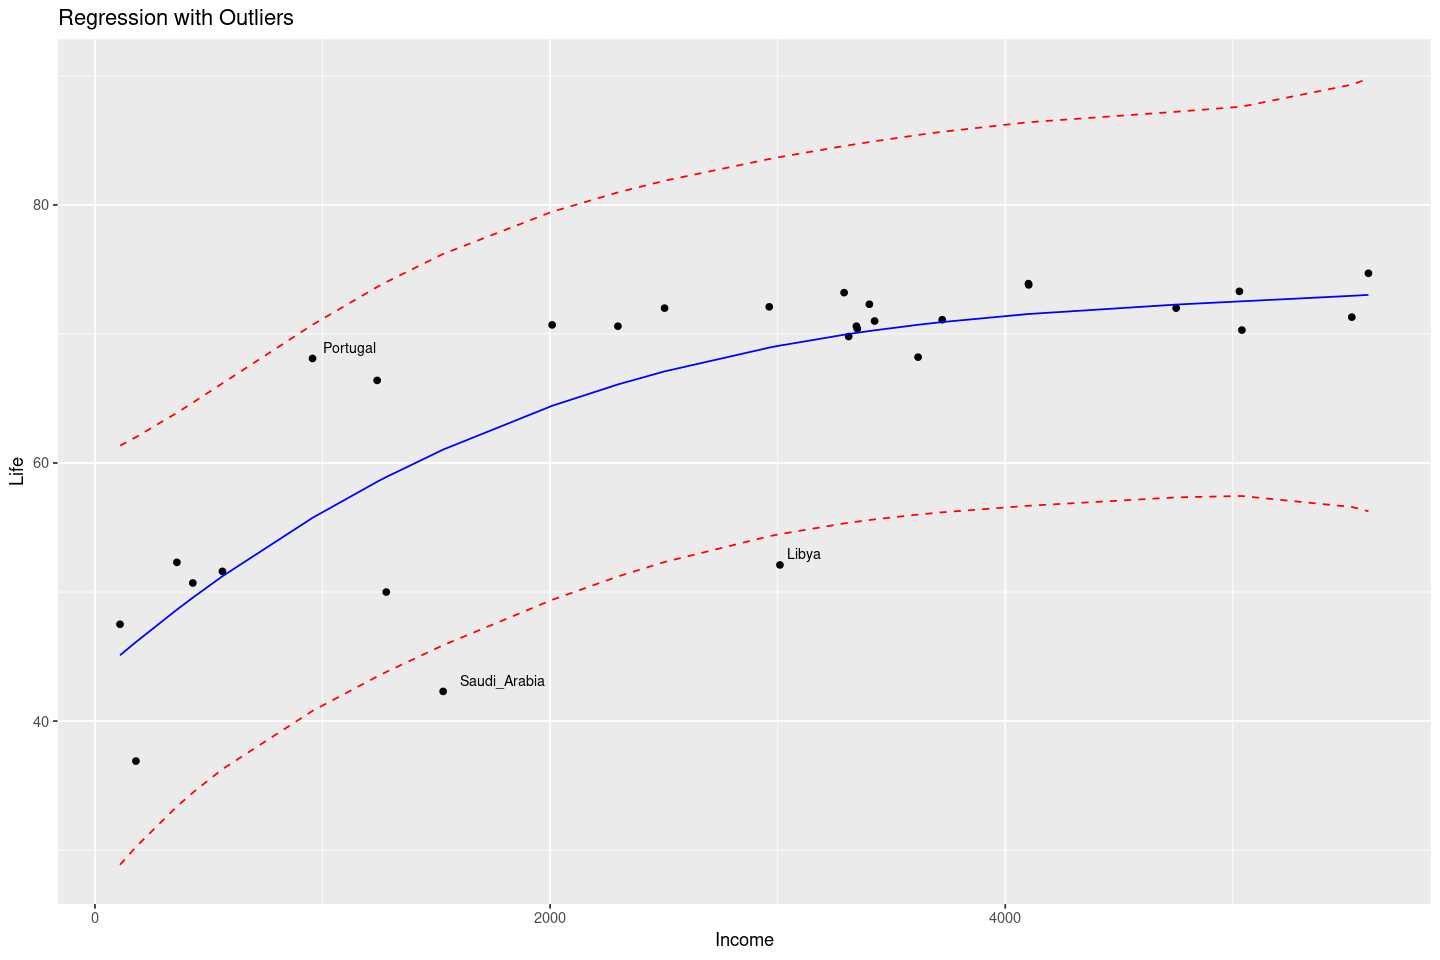

In [14]:
# Calculate distances from each point to the regression line
predict <- predict %>%
  mutate(residual = Life - fit)

# Sort points by decreasing distance
predict <- predict %>%
  arrange(desc(abs(residual)))

# Select top 3 outliers with largest distances
top_3_outliers <- head(predict, 3)

# Create the plot with points and model lines
ggplot(predict, aes(x = Income, y = Life)) +
  geom_point() +
  geom_line(aes(y = fit), color = "blue") +
  geom_line(aes(y = lwr), color = "red", linetype = "dashed") +
  geom_line(aes(y = upr), color = "red", linetype = "dashed") +
  # Add labels to the selected points
  geom_text(data = top_3_outliers, aes(label = Country), hjust = -0.2, vjust = -0.5, size = 3, color = "black") +
  labs(title = "Regression with Outliers", x = "Income", y = "Life")


* Z grafu vyplývá, že poměrně hodně bodů leží relativně daleko od přímky, což nám nehraje do karet.
* Také na grafu jsou podepsány země, které jsou nejdále od přímky (Portugal, Libya, Saudi Arabia). 

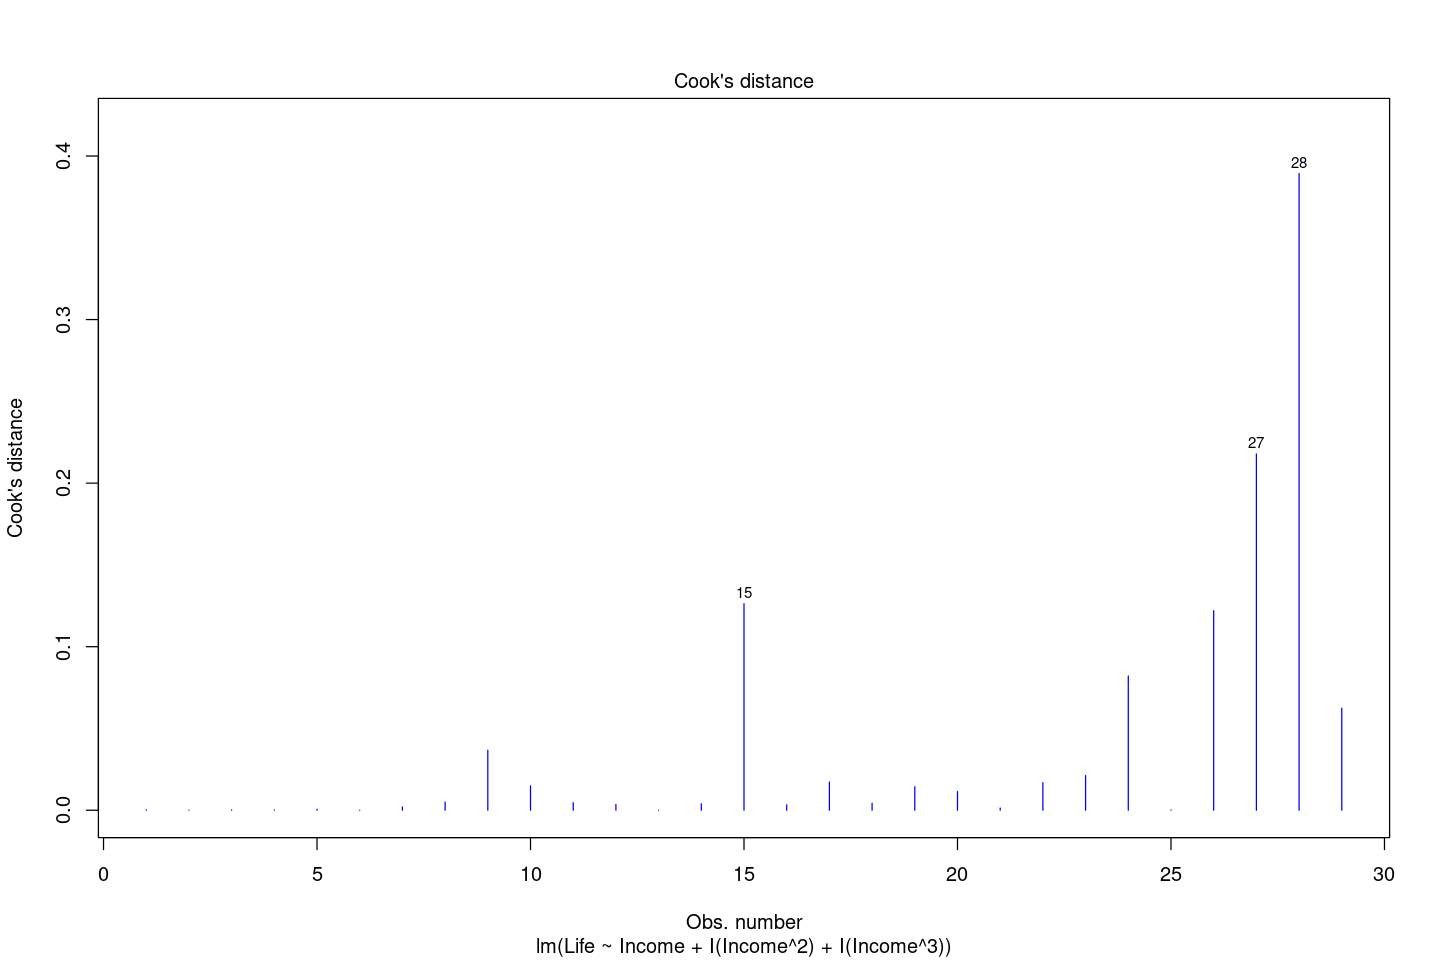

In [15]:
plot(fit, which=4, col=c("blue"))

* Tento graf popisuje Cookovou vzdálenost, která indikuje míru vlivu jednotlivých pozorování na hodnoty odhadů parametrů modelu.
* Vyjadřuje také outlaery, které silně ovlivňují hodnoty parametrů modelu ("silně táhnou přímku směrem k sobě") a tím mohou výrazně zhoršit model. 

In [16]:
summary(fit)


Call:
lm(formula = Life ~ Income + I(Income^2) + I(Income^3), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7401  -0.2751   0.7805   3.1595  12.3480 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.344e+01  4.555e+00   9.537 8.28e-10 ***
Income       1.545e-02  7.879e-03   1.961   0.0611 .  
I(Income^2) -2.864e-06  3.273e-06  -0.875   0.3900    
I(Income^3)  1.873e-10  3.729e-10   0.502   0.6199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.862 on 25 degrees of freedom
Multiple R-squared:  0.6584,	Adjusted R-squared:  0.6174 
F-statistic: 16.06 on 3 and 25 DF,  p-value: 5.014e-06


=====================================================================================
1. Odhady regresních koeficientů:
    * Intercept ((Intercept)): Odhadovaná hodnota délky života, když příjem na obyvatele = 0, je přibližně 43.44.
    * Příjem na obyvatele (Income): Přestože je mírně nad konvenční úrovní významnosti 0,05, p-hodnota pro koeficient příjmu naznačuje mezní úroveň významnosti (p = 0,0611). To znamená, že může existovat slabý vztah mezi příjmem na obyvatele a očekávanou délkou života, i když není dostatečně silný, aby byl konvenčními standardy považován za statisticky významný. Stojí za to další zkoumání, abychom zjistili, zda tento vztah platí v různých kontextech nebo s většími velikostmi vzorků.
    * Kvadratický člen příjmu (I(Income^2)): Koeficient kvadratického členu příjmu není statisticky významný (p = 0.39), což naznačuje, že kvadratický vliv příjmu na délku života není podstatný.
    * Kubický člen příjmu (I(Income^3)): Koeficient kubického členu příjmu také není statisticky významný (p = 0.62), což naznačuje, že kubický vliv příjmu na délku života není podstatný.

2. Kvalita modelu:
    * Rozptyl reziduí: Standardní chyba reziduí je přibližně 6.862.
    * R-squared a Adjusted R-squared: Model vysvětluje přibližně 65.84% variace v délce života. Adjusted R-squared, který bere v úvahu počet prediktorů, je přibližně 61.74%.
    * F-statistic: F-statistika pro celkový model je 16.06 s p-hodnotou 5.014e-06, což naznačuje, že aspoň jeden z regresních koeficientů není nulový.

3. Statistická významnost:
    * Intercept a příjem na obyvatele jsou statisticky významné na hladině významnosti 0.05.
    * Kvadratický a kubický člen příjmu nejsou statisticky významné na hladině významnosti 0.05.

In [17]:
fit <- lm(Life ~ Income + I(Income^2), data=data)
summary(fit)


Call:
lm(formula = Life ~ Income + I(Income^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7228  -0.7359   0.6097   3.0079  13.0505 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.495e+01  3.357e+00  13.390 3.56e-13 ***
Income       1.174e-02  2.722e-03   4.314 0.000206 ***
I(Income^2) -1.238e-06  4.817e-07  -2.571 0.016207 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.762 on 26 degrees of freedom
Multiple R-squared:  0.6549,	Adjusted R-squared:  0.6284 
F-statistic: 24.67 on 2 and 26 DF,  p-value: 9.833e-07


=====================================================================================

Po odstranění kubického členu z modelu došlo ke změně výsledků následovně:

* Koeficienty: Koeficienty pro Příjem a Příjem^2 zůstaly v modelu. Nicméně koeficient pro Příjem^2 se stal statisticky významným (p = 0.0162), zatímco koeficient pro Příjem zůstal významný (p = 0.0002).

* Hodnota R-kvadrátu: Hodnota R-kvadrátu zůstala téměř nezměněna (0.6549 po odstranění kubického členu ve srovnání s 0.6584 před odstraněním).

* F-statistika a p-hodnota: Hodnota F-statistiky se zvýšila a související p-hodnota se snížila, což naznačuje, že model je významnější (p-value: 9.833e-07 po odstranění kubického členu ve srovnání s 5.014e-06 před odstraněním).

Tím, že jsme se zbavili kubického člena, jsme model trochu vylepšili, ale stále nemohu otočit jazyk, abych tento model nazval v našem případě opravdu dobrým. Chyby předpovědi jsou dostatečně velké, dataset má málo dat a jsou přítomny outliery, takže je třeba ještě zapracovat pro získání lepšího modelu.

## Zkoumání kategorického regresoru

Vykresleme histogram pro Life dohromady i zvlášť v závislosti na jednotlivých typech zemí.

Stejně jak u boxplotu vidíme silnou je propast mezi průmyslově vyspělými zeměmi a zeměmi závislými na ropě.

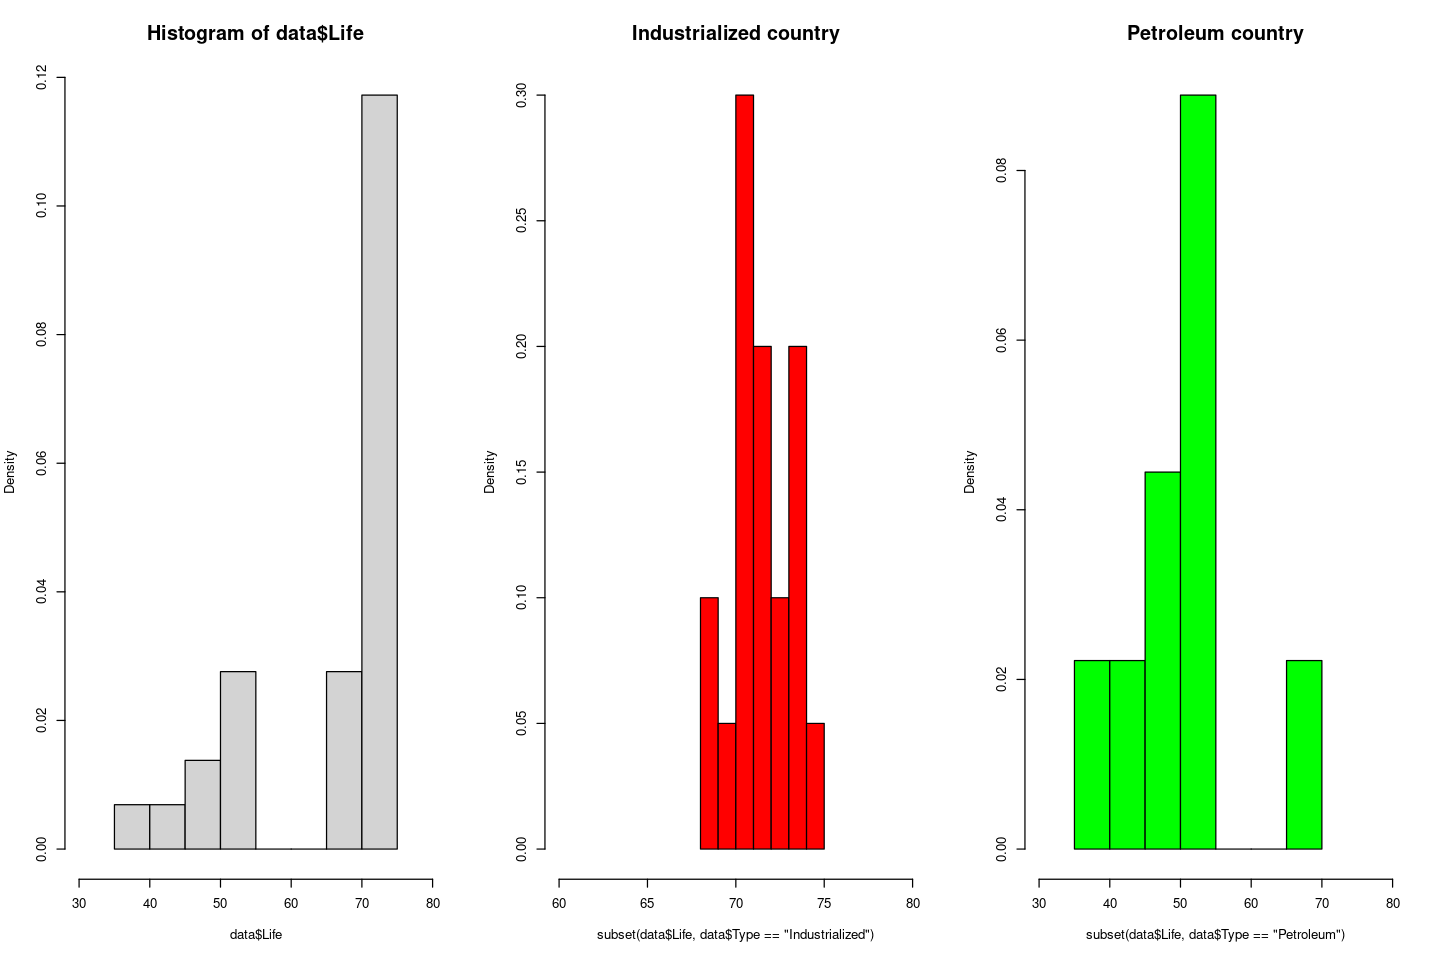

In [18]:
par(mfrow=c(1,3)) 
hist(data$Life,prob=T,xlim=c(30,80),cex.main=1.5)
hist(subset(data$Life,data$Type=='Industrialized'),prob=T,col="red",xlim=c(60,80),main='Industrialized country',cex.main=1.5)
hist(subset(data$Life,data$Type=='Petroleum'),prob=T,col="green",xlim=c(30,80),main='Petroleum country',cex.main=1.5)

#### Model

##### Interpretace regresních koeficientů:
* Intercept: když je země typu Industrialized, očekáváme průměrnou délku života 71.47 let.
* TypePetroleum: když se změní typ země z Industrialized na Petroleum, očekáváme, že průměrná délka života klesne o 21.49 let.

In [19]:
fitCountryType <- lm(Life ~ Type, data=data)
fitCountryType


Call:
lm(formula = Life ~ Type, data = data)

Coefficients:
  (Intercept)  TypePetroleum  
        71.47         -21.49  


##### Testy předpokladů

Aby fungovaly metody analýzy rozptylu, musíme ověřit:

 * Normalitu odchylek.
 * Shodu rozptylů odchylek napříč kategoriemi

Na první pohled histogramu odchýlek bych si troufnul řicí, že nejsou normálně rozdělené. Ověříme to Shapiro-Wilkovým testem. p-hodnota < 0.05, normalitu zamítáme.

Nesplnění předpokladů normálního rozdělení reziduí může zpochybnit výsledky analýzy rozptylu a může vést k nepřesným závěrům

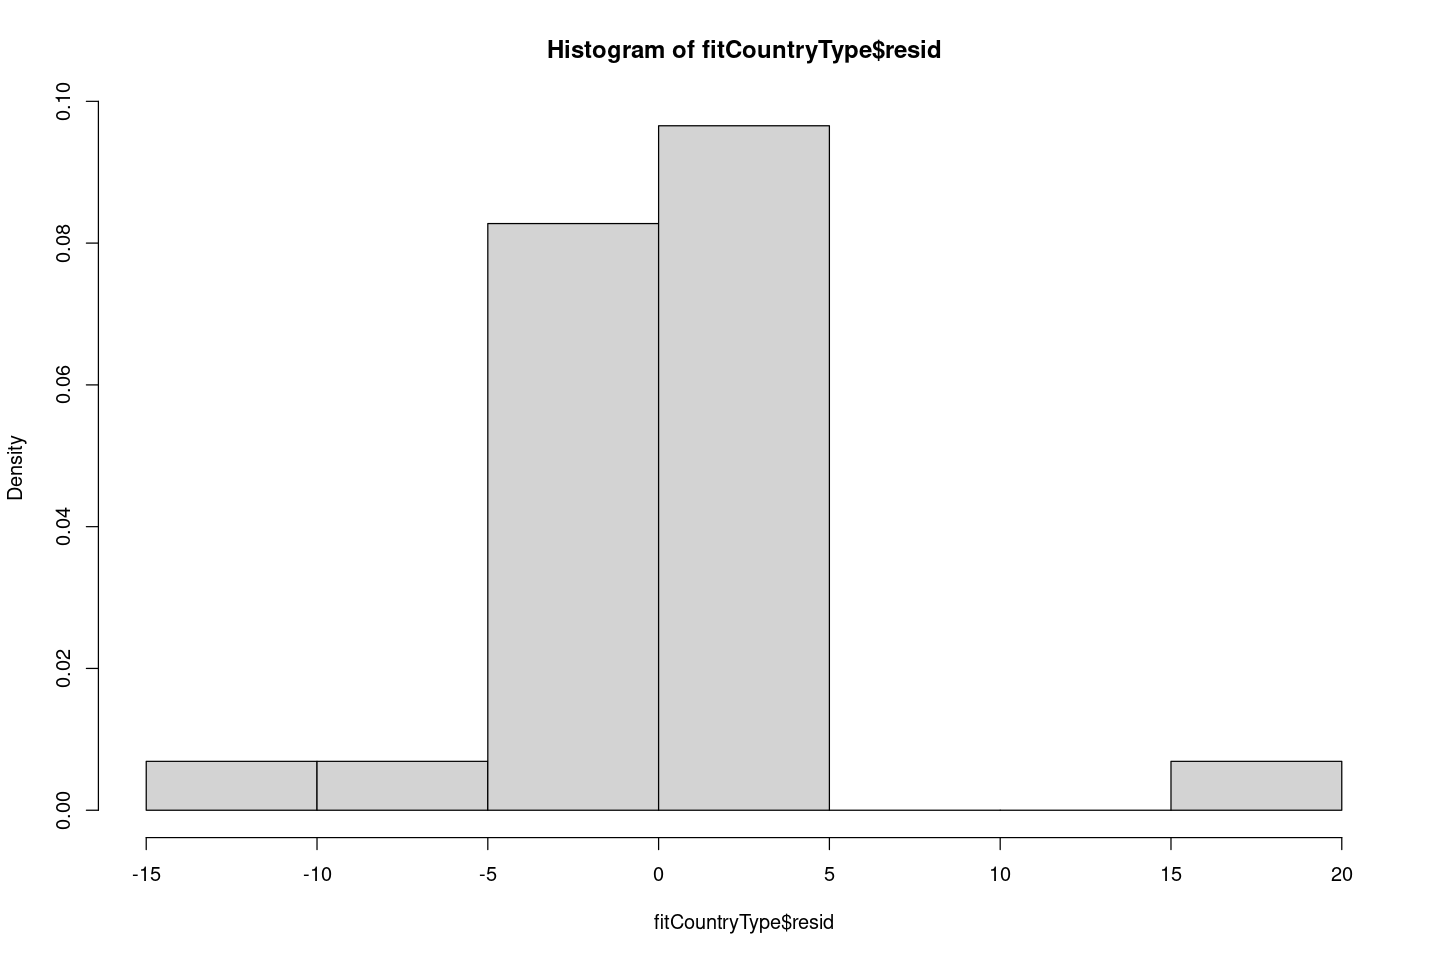

In [20]:
hist(fitCountryType$resid,prob=T)

In [21]:
shapiro.test(fitCountryType$resid)


	Shapiro-Wilk normality test

data:  fitCountryType$resid
W = 0.78123, p-value = 3.918e-05


#### Robustní model 

Pro provedení robustní analýzy rozptylu lmrob() z balíčku robustbase. Tato funkce umožňuje odolnou analýzu lineární regrese, která je méně citlivá na odlehlá pozorování a nesplnění předpokladů o normálním rozdělení reziduí.

Interpretace koeficientů je stejná. Hodnota interceptu a TypePetroleum se mírně liší mezi LM a LMRob, ale rozdíl není velký.

Ověříme předpoklady zase stejným testem, kde opět zamítáme normalitu.

In [22]:
#install.packages("robustbase")
library(robustbase)

fitCountryType_robust <- lmrob(Life ~ Type, data = data)
fitCountryType_robust


Call:
lmrob(formula = Life ~ Type, data = data)
 \--> method = "MM"
Coefficients:
  (Intercept)  TypePetroleum  
        71.48         -20.79  


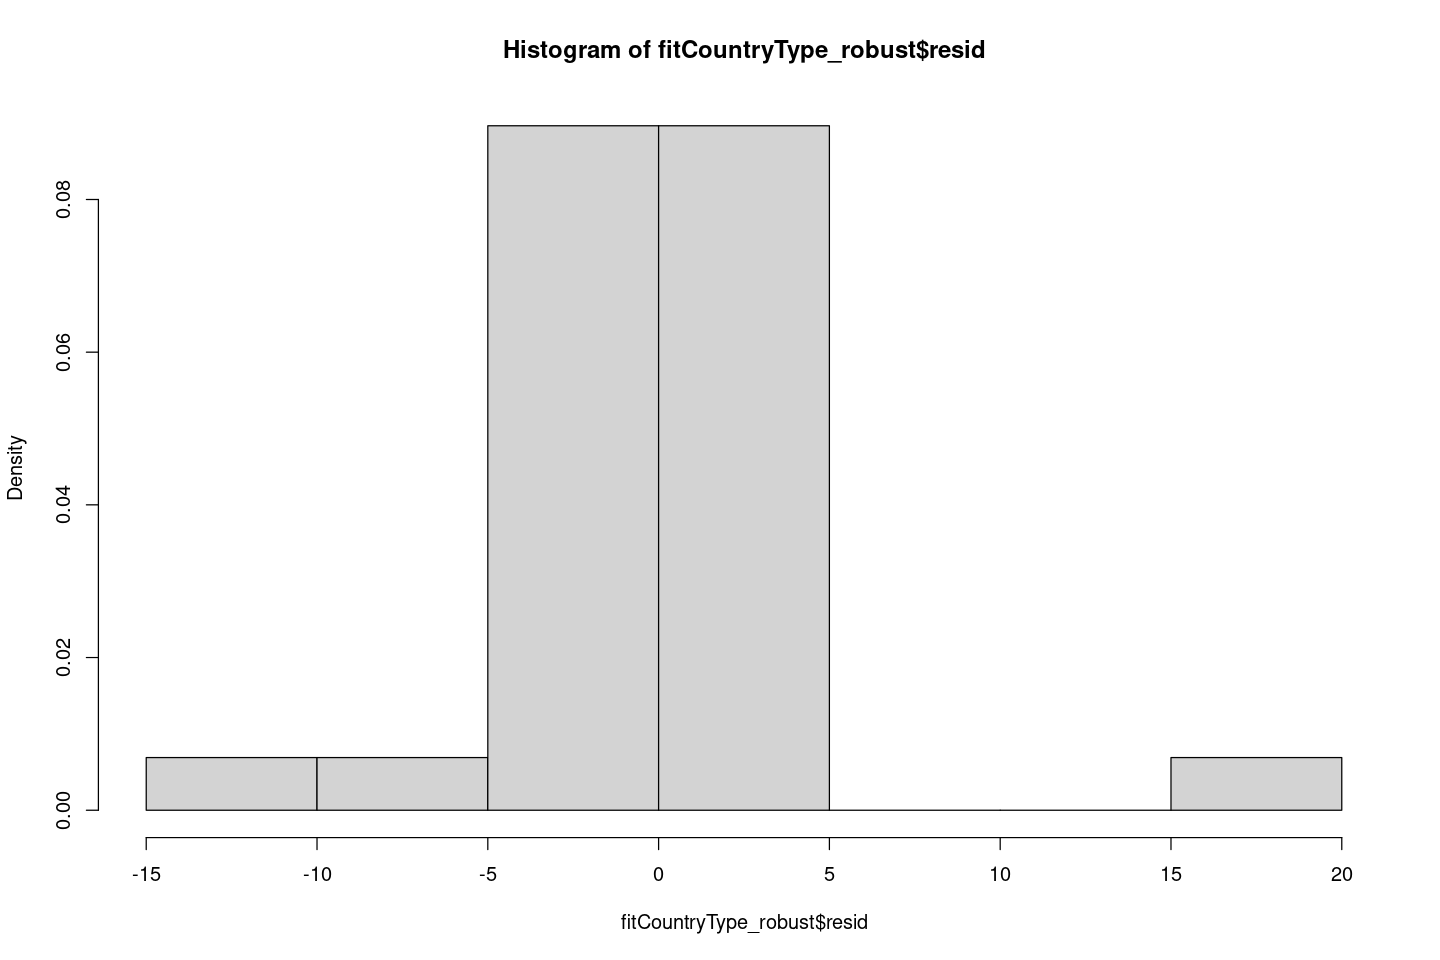

In [23]:
hist(fitCountryType_robust$resid,prob=T)

In [24]:
shapiro.test(fitCountryType_robust$resid)


	Shapiro-Wilk normality test

data:  fitCountryType_robust$resid
W = 0.78061, p-value = 3.824e-05


In [25]:
summary(fitCountryType)


Call:
lm(formula = Life ~ Type, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0778  -1.0700   0.0222   1.7300  16.4222 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     71.470      1.035   69.05  < 2e-16 ***
TypePetroleum  -21.492      1.858  -11.57 5.71e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.629 on 27 degrees of freedom
Multiple R-squared:  0.8321,	Adjusted R-squared:  0.8259 
F-statistic: 133.8 on 1 and 27 DF,  p-value: 5.713e-12


=====================================================================================

* Koeficient determinace je 0.8321. To znamená, že 83.21% variability vysvětlované proměnné je vysvětleno modelem. Model dobře vysvětluje variabilitu vysvětlované proměnné
* Koeficient pro intercept (71.47) je statisticky významný (p < 2 * 10^-16), což naznačuje, že průměrná délka života je statisticky odlišná od nuly pro země typu Industrialized, což je takové logické
* Koeficient pro typ země Petroleum (-21.49) je také statisticky významný (p = 5.71 * 10^-12), což naznačuje, že existuje statisticky významný rozdíl ve střední délce života mezi zeměmi typu Industrialized a Petroleum. Danou informaci jsme mohli vidět i na histogramech/boxplotech výše.
* Hodnota F-statistiky je 133.8 s p-hodnotou 5.713e-12. Tento výsledek ukazuje, že model je statisticky významný

In [26]:
summary(fitCountryType_robust)


Call:
lmrob(formula = Life ~ Type, data = data)
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-13.7950  -1.0804  -0.1803   1.4050  15.7050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    71.4804     0.3984  179.42   <2e-16 ***
TypePetroleum -20.7853     1.1188  -18.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Robust residual standard error: 2.071 
Multiple R-squared:  0.9581,	Adjusted R-squared:  0.9566 
Convergence in 9 IRWLS iterations

Robustness weights: 
 2 observations c(27,29) are outliers with |weight| = 0 ( < 0.0034); 
 2 weights are ~= 1. The remaining 25 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06331 0.88900 0.97060 0.90080 0.98710 0.99690 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol           rel.tol         scale.tol         solve.tol          zero.tol 
        1.548e+00         5.

=====================================================================================

##### Srovnání s předchozím modelem
* Robustní model má vyšší R-squared, což naznačuje, že robustní model lépe vysvětluje variabilitu vysvětlované proměnné.
* V obou modelech jsou koeficienty statisticky významné a mají podobnou úroveň významnosti.
* Robustní model má nižší standardní chybu reziduí, což naznačuje, že je robustnější vůči odlehlým pozorováním, což jsme očekávali od daného modelu
* vysoké Adjusted R-squared a F-statistiky, což naznačuje, že jsou oba modely statisticky významné.

Celkově lze říci, že robustní model (LMRob) je lepší volbou než běžný lineární model (LM) v tomto konkrétním případě

## Model obsahující oba regresory z předchozích bodů včetně jejich interakce

Uvažujme následující model:
 $$y = \hat\beta_0 + \hat\beta_1\cdot TypePetroleum + \hat\beta_2 \cdot Income + \hat\beta_3 \cdot TypePetroleum\cdot Income$$ 

##### Interpretace regresních koeficientů:
* Intercept: 68.69 let. To znamená, že odhadnutá průměrná délka života pro zemi typu Industrialized při nulové hodnotě příjmů je přibližně 68.69 let
* TypePetroleum: rozdíl v průměrné délce života mezi zeměmi typu Petroleum a Industrialized při nulové hodnotě příjmů. To znamená, že průměrná délka života pro zemi typu Petroleum je o 20.76 let nižší než pro zemi typu Industrialized při nulové hodnotě příjmů.
* Income: změna v průměrné délce života pro každý jednotkový nárůst příjmu. To znamená, že každý $ příjmu je spojen s nárůstem průměrné délky života o 0.0007673 roku
* TypePetroleum:Income: změna příjmu promítá do změny ve vztahu mezi průměrnou délkou života a typem země. V našem případě vliv příjmu na průměrnou délku života se liší mezi zeměmi typu "Petroleum" a "Industrialized".

In [27]:
fitInteraction <- lm(Life ~ Type * Income, data = data)
fitInteraction


Call:
lm(formula = Life ~ Type * Income, data = data)

Coefficients:
         (Intercept)         TypePetroleum                Income  TypePetroleum:Income  
           6.869e+01            -2.076e+01             7.673e-04             1.347e-03  


In [28]:
summary(fitInteraction)


Call:
lm(formula = Life ~ Type * Income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4145  -1.3282  -0.3234   1.7116  15.8443 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.869e+01  3.382e+00  20.310  < 2e-16 ***
TypePetroleum        -2.076e+01  4.088e+00  -5.078 3.04e-05 ***
Income                7.673e-04  8.905e-04   0.862    0.397    
TypePetroleum:Income  1.347e-03  1.976e-03   0.682    0.502    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.613 on 25 degrees of freedom
Multiple R-squared:  0.8456,	Adjusted R-squared:  0.827 
F-statistic: 45.63 on 3 and 25 DF,  p-value: 2.749e-10


=====================================================================================

* Intercept je statisticky významný. Průměrná délka života při nulové hodnotě příjmů je statisticky odlišná od nuly.
* Koeficient pro typ země Petroleum je také statisticky významný (p < 0.001).
* Koeficient Income není statisticky významný (p = 0.397). To naznačuje, že v tomto modelu není dostatečná evidence pro to, že příjem má vliv na průměrnou délku života.
* Koeficient interakce TypePetroleum:Income také není statisticky významný (p = 0.502)
* R-squared je 0.8456, což naznačuje, že 84.56% variability vysvětlované proměnné je vysvětleno modelovými proměnnými. Robustní model s kategorickým příznakem měl R-squared mnohem vyšší
* F-statistika má hodnotu 45.63 s p-hodnotou 2.749e-10, což naznačuje, že celkový model je statisticky významný, alespoň jeden z regresorů je významný ( Intercept a TypePetroleum)

### Zobrazení regresní závislosti
Ideálně bychom chtěli vidět, že body v scatterplotu jsou rovnoměrně rozptýleny kolem horizontální čáry nulových reziduí a histogram by měl být přibližně normální, což v našem případě se bohužel nestalo.

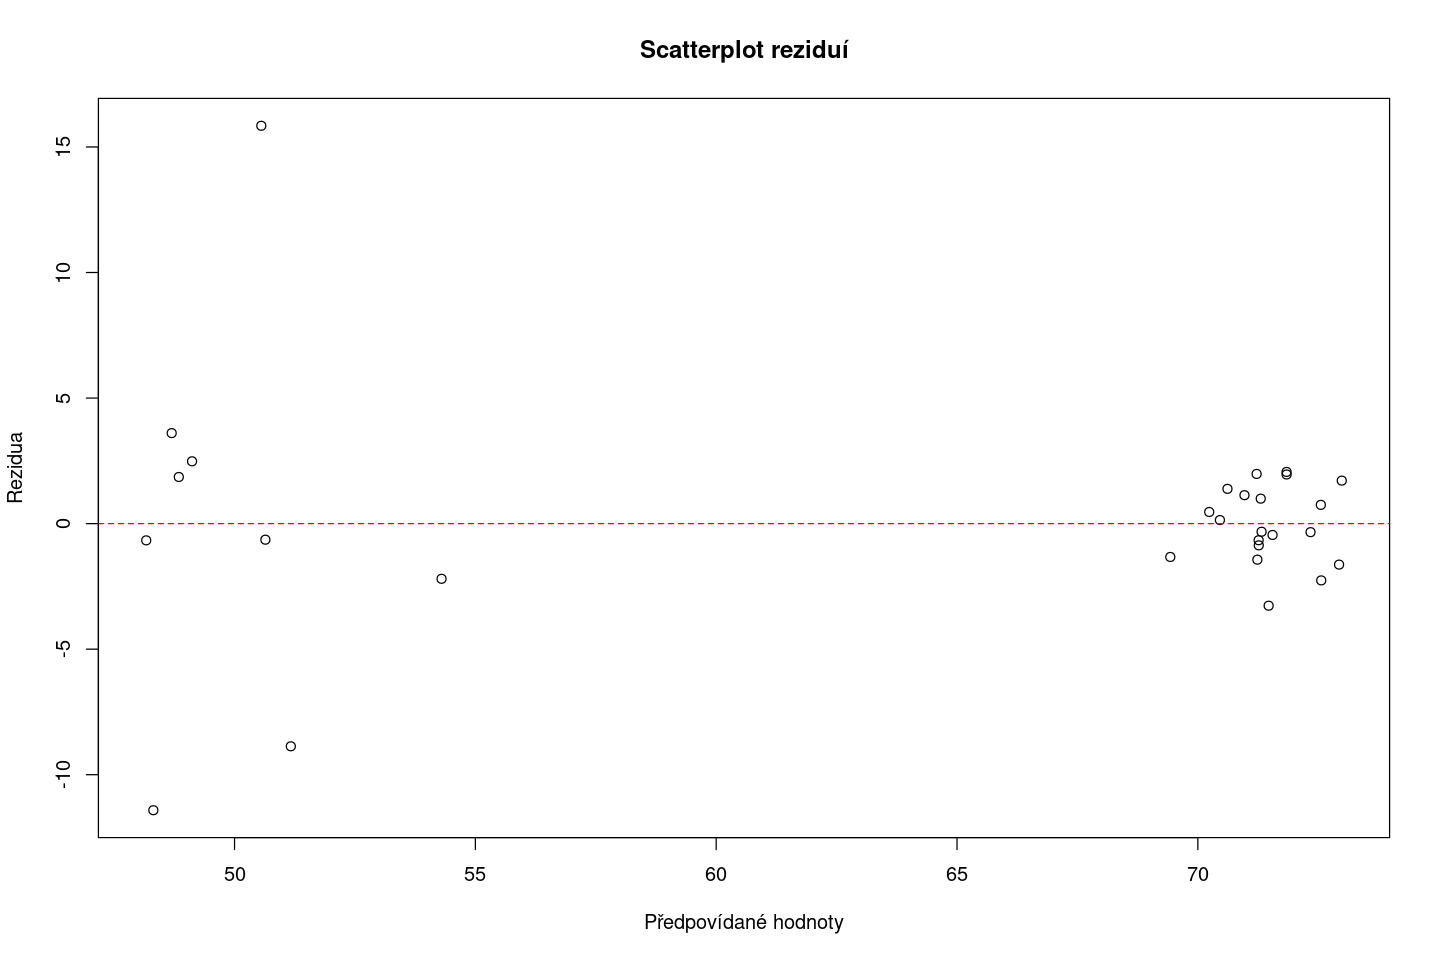

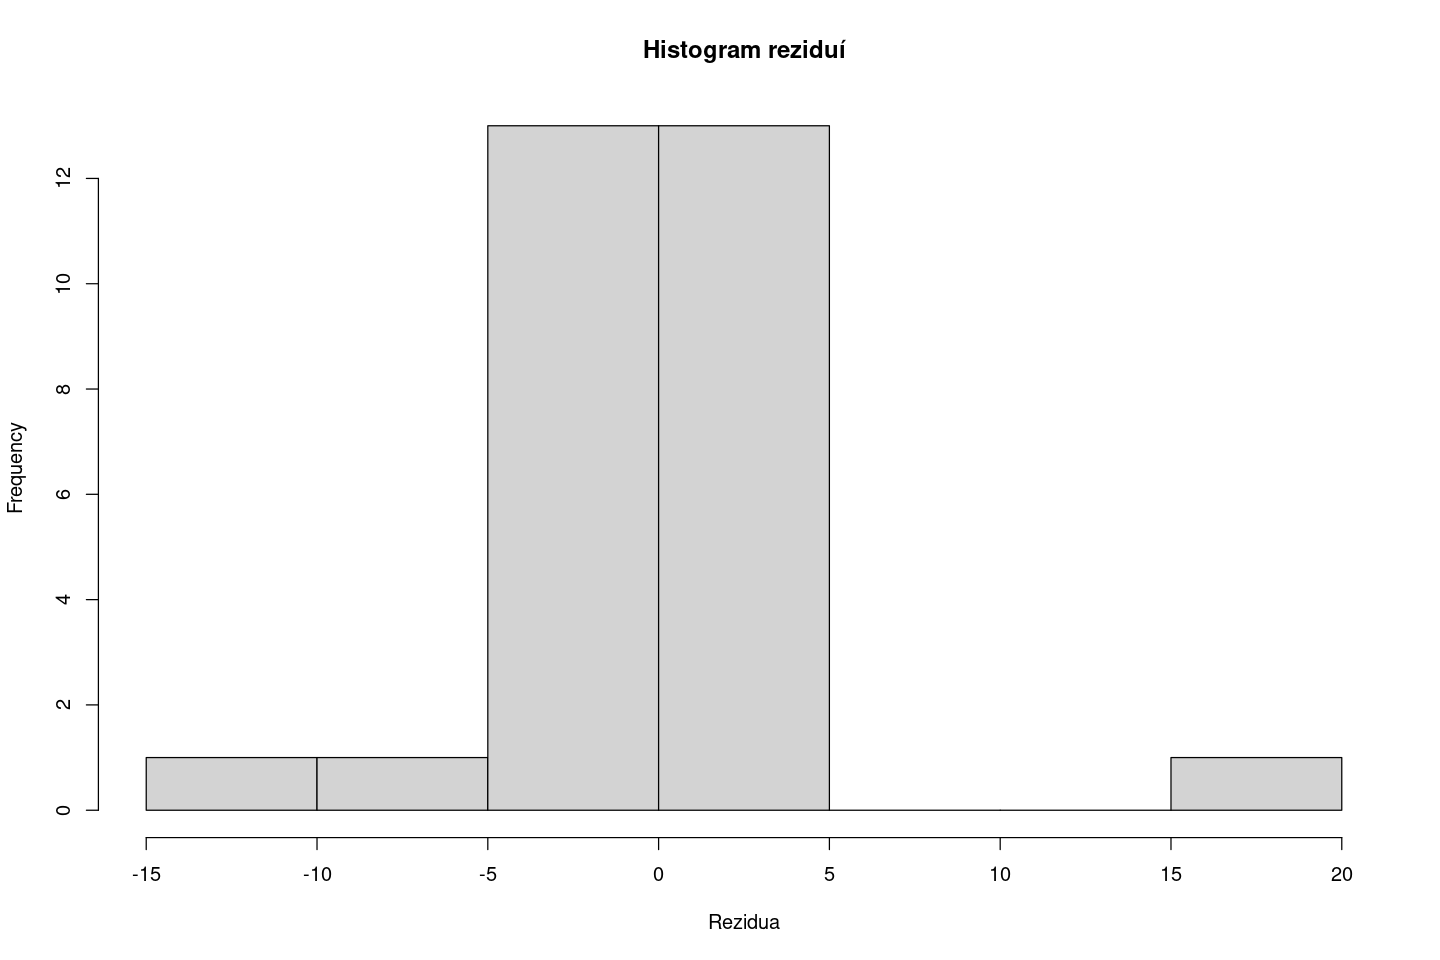

In [29]:
plot(fitInteraction$fitted.values, fitInteraction$residuals, 
     xlab = "Předpovídané hodnoty", ylab = "Rezidua",
     main = "Scatterplot reziduí")
abline(h = 0, col = "red", lty = 2)

hist(fitInteraction$residuals, 
     main = "Histogram reziduí",
     xlab = "Rezidua")

Podle mého názoru predikce tohoto modelu se mi nezdá tak špatná. Výjimkou tvoří outliery, kde chyba je mnohem horší. 

In [30]:
tmp <- predict(fitInteraction, interval="prediction")
predict <- cbind(data, tmp)
predict$Type = NULL
predict

Warning message in predict.lm(fitInteraction, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


,Country,Life,Income,fit,lwr,upr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,71.0,3426,71.32337,61.58099,81.06575
2,Austria,70.4,3350,71.26506,61.51667,81.01345
3,Belgium,70.6,3346,71.26199,61.51323,81.01075
4,Canada,72.0,4751,72.34001,62.38430,82.29572
5,Denmark,73.3,5029,72.55331,62.47874,82.62788
6,Finland,69.8,3312,71.23591,61.48376,80.98805
7,France,72.3,3403,71.30573,61.56174,81.04972
8,West_Germany,70.3,5040,72.56175,62.48198,82.64152
9,Ireland,70.7,2009,70.23615,60.06314,80.40916


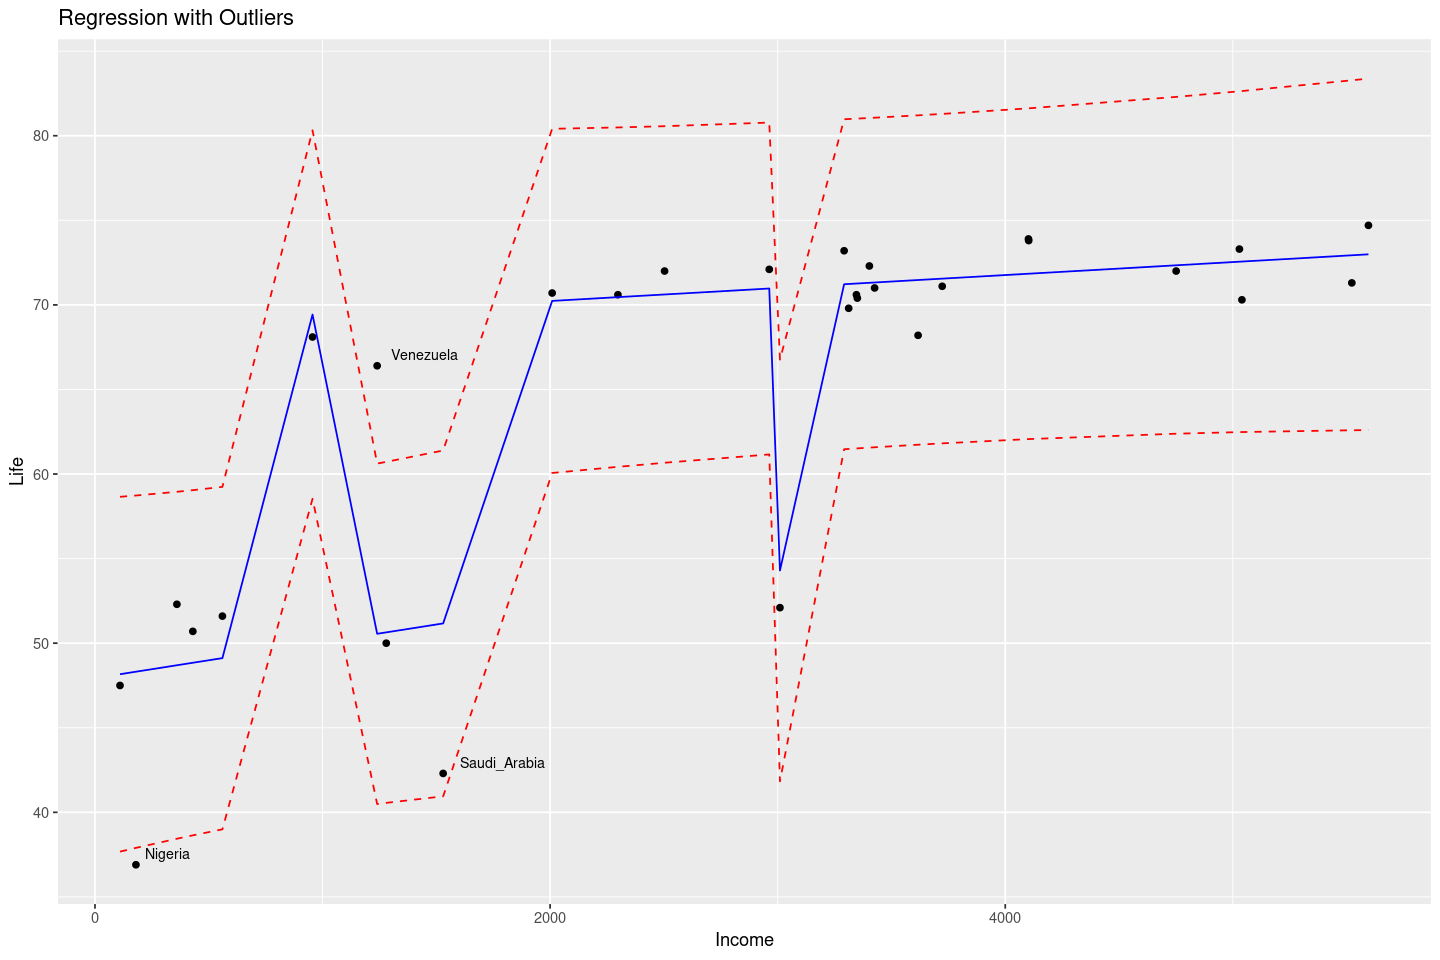

In [31]:
# Calculate distances from each point to the regression line
predict <- predict %>%
  mutate(residual = Life - fit)

# Sort points by decreasing distance
predict <- predict %>%
  arrange(desc(abs(residual)))

# Select top 3 outliers with largest distances
top_3_outliers <- head(predict, 3)

# Create the plot with points and model lines
ggplot(predict, aes(x = Income, y = Life)) +
  geom_point() +
  geom_line(aes(y = fit), color = "blue") +
  geom_line(aes(y = lwr), color = "red", linetype = "dashed") +
  geom_line(aes(y = upr), color = "red", linetype = "dashed") +
  # Add labels to the selected points
  geom_text(data = top_3_outliers, aes(label = Country), hjust = -0.2, vjust = -0.5, size = 3, color = "black") +
  labs(title = "Regression with Outliers", x = "Income", y = "Life")